# Membuktikan Rumus DFT

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

### Membuat Sinyal Kombinasi (dari 3 sinyal yang berbeda)

In [36]:
duration = 5 # seconds
fs = 100 # Sampling rate: Hz
f_1 = 5 # Hz
f_2 = 12 # Hz
f_3 = 15 # Hz
f_4 = 20 # Hz
f_5 = 22.5 # Hz

time_axis = np.linspace(0, duration, duration*fs)

In [37]:
signal_1 = np.sin(2*np.pi*f_1*time_axis)
signal_2 = np.sin(2*np.pi*f_2*time_axis)
signal_3 = np.sin(2*np.pi*f_3*time_axis)
signal_4 = np.sin(2*np.pi*f_4*time_axis)
signal_5 = np.sin(2*np.pi*f_5*time_axis)

In [38]:
noise = np.random.normal(0, 0.9, duration*fs)
signal_combination = signal_1 + signal_2 + signal_3 + signal_4 + signal_5 + noise

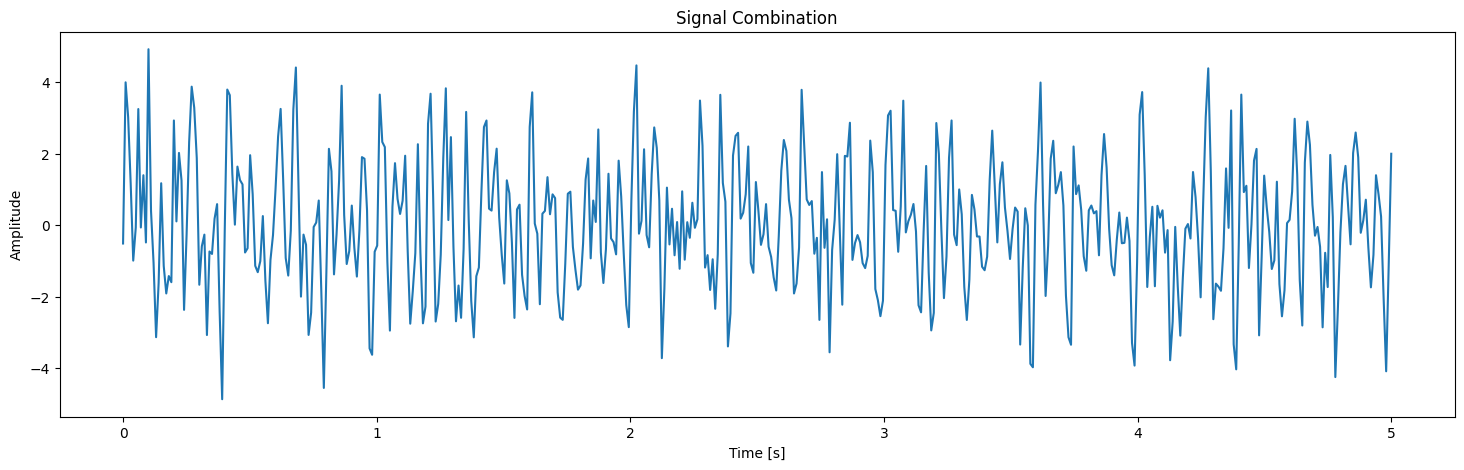

In [39]:
plt.figure(figsize=(18, 5))
plt.plot(time_axis, signal_combination)
plt.title('Signal Combination')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

### Fungsi DFT

In [40]:
def fungsi_DFT(x):
    # Langkah 1: Menghitung panjang sinyalnya
    N = len(x)
    
    # Langkah 2: Membuat variabel penampung untuk hasil DFT
    X = np.zeros(N, dtype=complex)
    
    # Langkah 3: Memproses DFT Berdasarkan Panjang Sinyal
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j*np.pi*k*n/N)
            
    return X

In [41]:
print(f"Panjang sinyal: {len(signal_combination)}")

Panjang sinyal: 500


### Perhitungan DFT

In [42]:
waktu_mulai = dt.datetime.now()
hasil_dft = fungsi_DFT(signal_combination)
waktu_selesai = dt.datetime.now()
print('Waktu Eksekusi DFT: ', waktu_selesai - waktu_mulai)

Waktu Eksekusi DFT:  0:00:00.181115


### Visualisasi Hasil Fourier Transform dengan DFT

In [43]:
freq = np.fft.fftfreq(len(signal_combination), 1/fs)
freq_masking = (freq >= 0) & (freq <= fs/2)

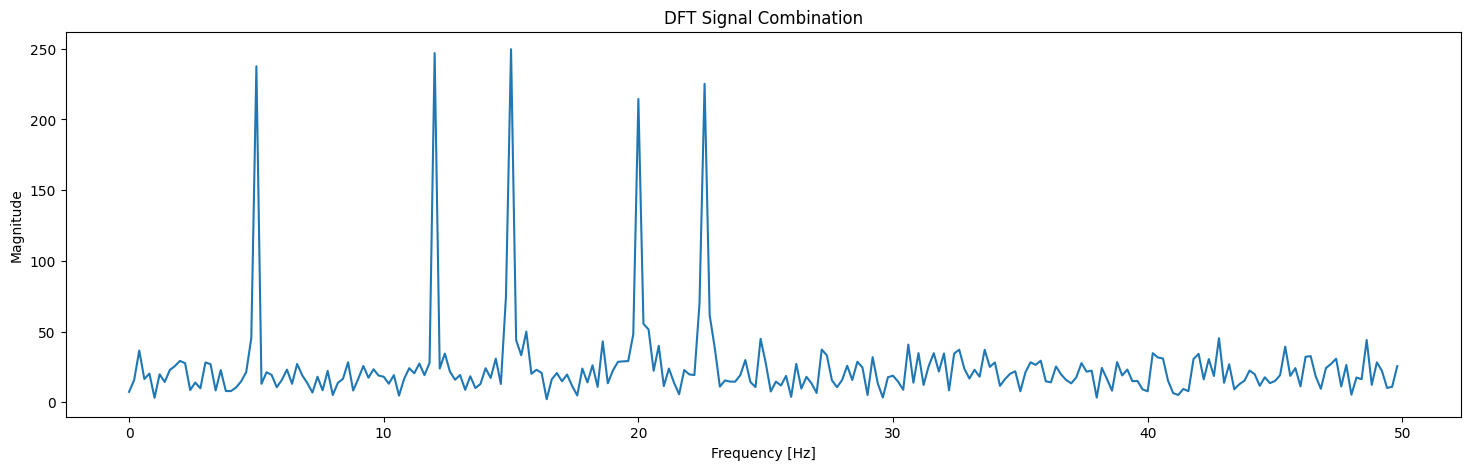

In [44]:
plt.figure(figsize=(18, 5))
plt.plot(freq[freq_masking], np.abs(hasil_dft[freq_masking]))
plt.title('DFT Signal Combination')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

---
# FFT

akan menggunakan sinyal yang sama

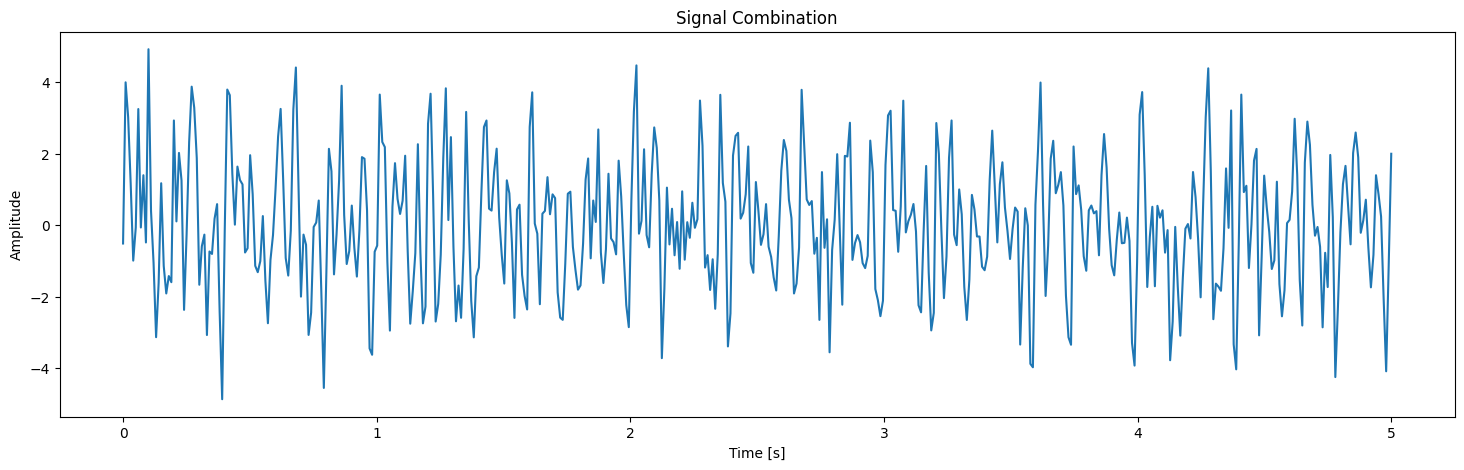

In [45]:
plt.figure(figsize=(18, 5))
plt.plot(time_axis, signal_combination)
plt.title('Signal Combination')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

### Fungsi FFT

In [46]:
def fungsi_fft(signal):
    """
    Calculate Fast Fourier Transform (FFT) using iterative decimation in time.
    
    Parameters:
    signal (array): Input time domain signal
    
    Returns:
    array: Frequency domain representation
    """
    signal = np.asarray(signal, dtype=complex)
    N = len(signal)
    
    # Find next power of 2
    power = int(np.ceil(np.log2(N)))
    size = 1 << power  # 2^power
    
    # Pad signal with zeros to make it length of power of 2
    signal = np.pad(signal, (0, size - N))
    
    # Bit reversal permutation
    bits = power
    j = 0
    for i in range(1, size):
        swapPos = size >> 1
        
        while j >= swapPos:
            j -= swapPos
            swapPos >>= 1
            if swapPos == 0:
                break
                
        j += swapPos
        
        if i < j:
            signal[i], signal[j] = signal[j], signal[i]
    
    # Compute FFT using decimation in time
    block_size = 2
    while block_size <= size:
        angle = -2 * np.pi / block_size
        w = np.exp(1j * angle)
        
        for i in range(0, size, block_size):
            current_w = 1
            
            for j in range(i, i + block_size // 2):
                k = j + block_size // 2
                temp = current_w * signal[k]
                signal[k] = signal[j] - temp
                signal[j] = signal[j] + temp
                current_w *= w
                
        block_size *= 2
    
    # Return only the part corresponding to the original signal length
    return signal[:N]

### Menggunakan Fungsi FFT

In [50]:
waktu_mulai = dt.datetime.now()
hasil_fft = fungsi_fft(signal_combination)
waktu_selesai = dt.datetime.now()

print(f"Waktu Eksekusi FFT: {waktu_selesai - waktu_mulai}")

Waktu Eksekusi FFT: 0:00:00.001688


### Visualisasi

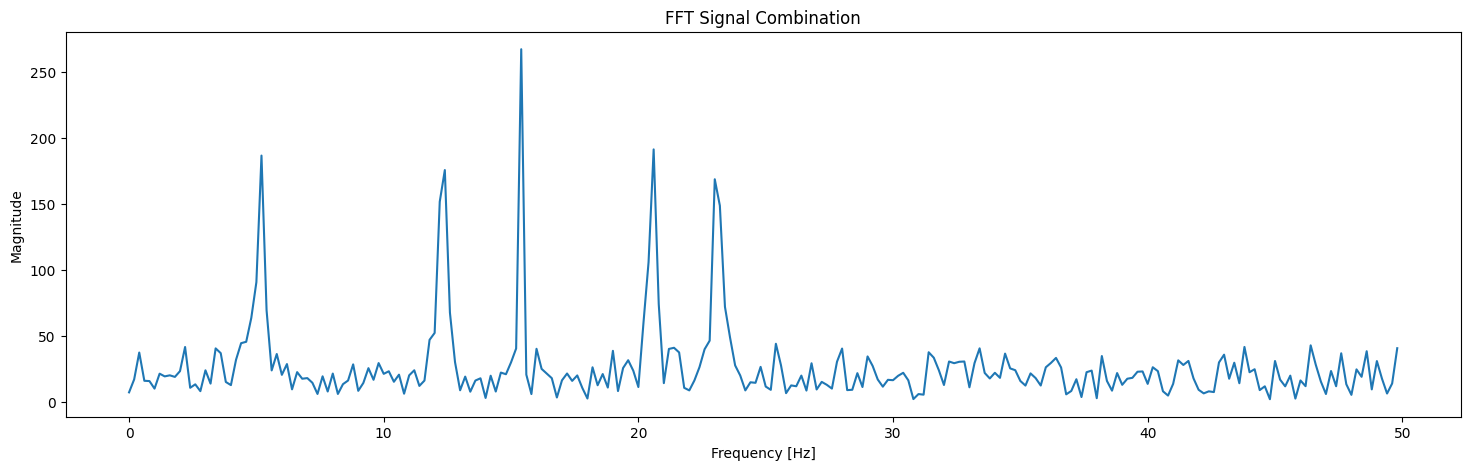

In [48]:
plt.figure(figsize=(18, 5))
plt.plot(freq[freq_masking], np.abs(hasil_fft[freq_masking]))
plt.title('FFT Signal Combination')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

### Komparasi

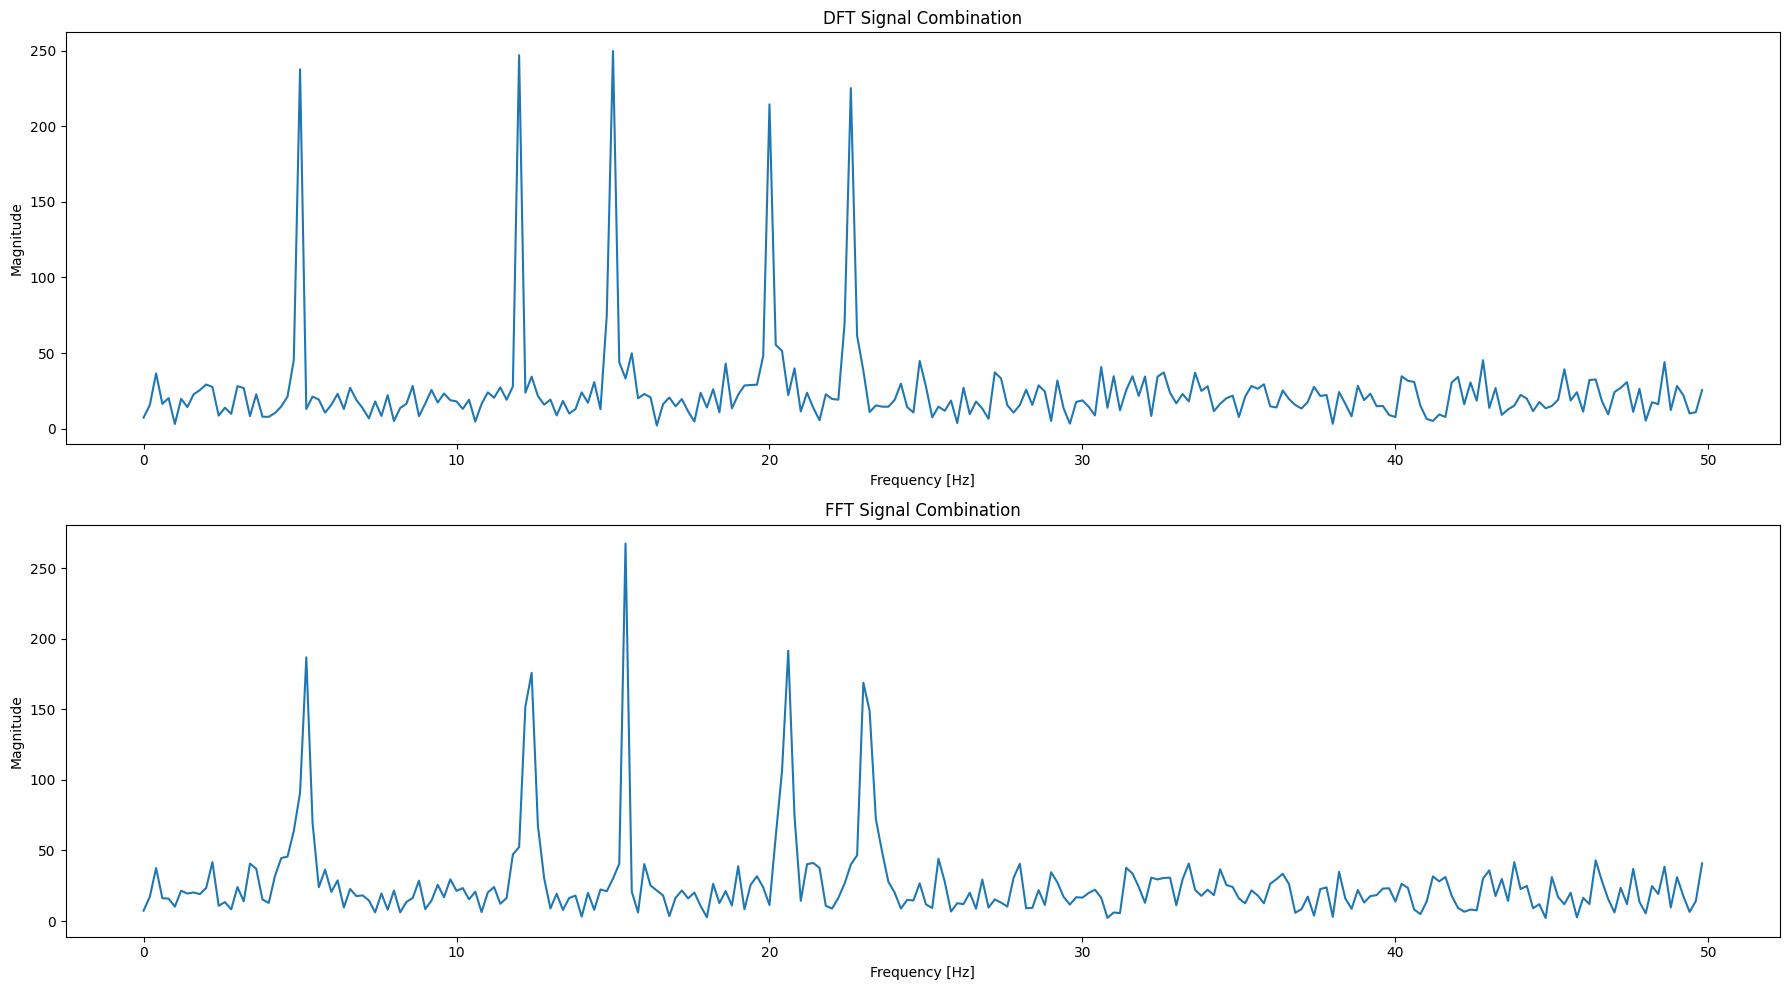

In [49]:
plt.figure(figsize=(18, 10))

# Plot DFT result
plt.subplot(2, 1, 1)
plt.plot(freq[freq_masking], np.abs(hasil_dft[freq_masking]))
plt.title('DFT Signal Combination')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Plot FFT result
plt.subplot(2, 1, 2)
plt.plot(freq[freq_masking], np.abs(hasil_fft[freq_masking]))
plt.title('FFT Signal Combination')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

### FFT dengan scipy

In [51]:
from scipy import fft

# Langkah 1: Hitung Panjang Sinyal
N = len(signal_combination)

# Langkah 2: Hitung FFT Menggunakan Fungsi FFT SciPy
fft_results = fft.fft(signal_combination)

# Langkah 3: Hitung x-axisnya
freq = fft.fftfreq(N, 1/fs)

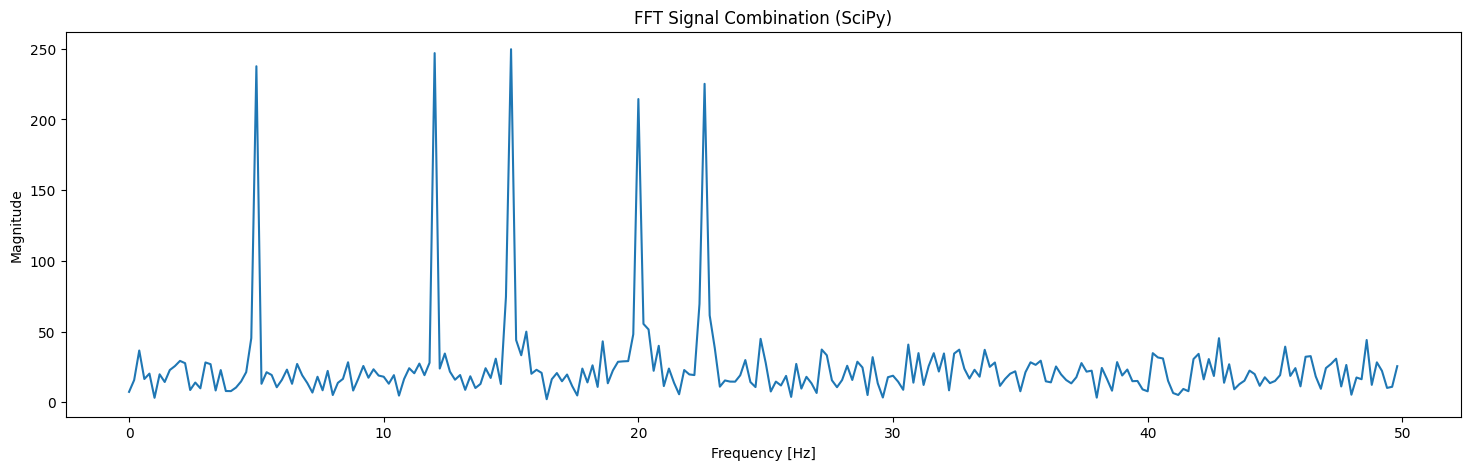

In [52]:
plt.figure(figsize=(18, 5))
plt.plot(freq[freq_masking], np.abs(fft_results[freq_masking]))
plt.title('FFT Signal Combination (SciPy)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()